# Analiza meteorološki podatkov

Branje podatkov iz arhiva ARSO, analiza meritev. Informacije o podatkih so na voljo na  
[http://meteo.arso.gov.si/met/sl/service/](http://meteo.arso.gov.si/met/sl/service/)


Krištof Oštir, 2017-01-20

In [1]:
# Potrebne knjižnice
# import requests
import urllib.request
import xml.etree.ElementTree as ET
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Matplotlib
%matplotlib inline
# Plotting style
matplotlib.style.use('bmh')
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)

Najprej preberemo datoteko XML iz spletne strani ARSO.

In [2]:
# Station ID
# meteo_station_ID = 'KRANJ'
# meteo_station_ID = 'LJUBL-ANA_BRNIK'
meteo_station_ID = 'LJUBL-ANA_BEZIGRAD'

In [28]:
meteo_xml_head = 'http://meteo.arso.gov.si/uploads/probase/www/observ/surface/text/sl/recent/observationAms_'
meteo_xml_tail = '_history.xml'
meteo_xml = meteo_xml_head + meteo_station_ID + meteo_xml_tail
meteo_file = meteo_xml.split('/')[-1]
meteo_xml_req = urllib.request.urlopen(meteo_xml)
meteo_xml_data = meteo_xml_req.read()

In [31]:
meteo_xml_req.code

200

Pregledamo vsebimo datoteke XML (parse) in izvlečemo podatke v `metData`

In [5]:
# Parsamo datoteko XML
tree = ET.fromstring(meteo_xml_data)

Prikažemo vsebino XML datoteke in vidmo njeno strukturo.

In [6]:
print('Vsebina XML\n')

# for c in tree:
#    print(c.tag,':', c.text)
#    for x in c:
#        print('- ', x.tag,':', x.text)

Vsebina XML



Ime postaje

In [7]:
meteo_data_first = tree.find('metData')
station_name = meteo_data_first.find('domain_longTitle').text
print(station_name)

Ljubljana


In [22]:
meteo_data_first.getchildren().attrib

AttributeError: 'list' object has no attribute 'attrib'

Poiščemo elemente metData in sestavimo tabelo meritev:
* ime postaje - `domain_longTitle`
* čas - `tsValid_issued`
* meritve temperature - `tavg`
* vsota padavin - `rr_val`

In [23]:
dt = "17.12.2007 7:00 UTC"
dt_f = datetime.strptime(dt, "%d.%m.%Y %H:%M %Z")

In [24]:
dt_f.isoformat()

'2007-12-17T07:00:00'

In [25]:
# V metData poiščemo čase (tsValid_issued) in meritve (tavg, rr_val, pavg, ffavg_val_kmh) 
meteo_data_elements = tree.findall('metData')
meteo_data = []
for data in meteo_data_elements:
    temp = float(data.find('tavg').text) if data.find('tavg').text != None else None
    perc = float(data.find('rr_val').text) if data.find('rr_val').text != None else None
    wind = int(data.find('ffavg_val_kmh').text) if data.find('ffavg_val_kmh').text != None else None
    pres = float(data.find('pavg').text) if data.find('pavg').text != None else None
    cond = str(data.find('nn_icon-wwsyn_icon').text) if data.find('nn_icon-wwsyn_icon').text != None else np.nan
    date_time = datetime.strptime(data.find('tsValid_issued_UTC').text, '%d.%m.%Y %H:%M %Z')
    meteo_data.append([date_time, temp, perc, wind, pres, cond])

Ustvari set podatkov (dataframe).

In [26]:
meteo_data_df = pd.DataFrame(meteo_data)
meteo_data_df.columns = ['DateTime', 'Temp', 'Perc', 'Wind', 'Pres', 'Cond']
meteo_data_df = meteo_data_df.set_index('DateTime')
meteo_data_df

,Temp,Perc,Wind,Pres,Cond
DateTime,,,,,
2017-01-21 15:00:00,-0.1,0.0,2,995.6,NaN
2017-01-21 14:30:00,-0.6,0.0,2,995.7,mostClear
2017-01-21 14:00:00,-1.0,0.0,3,995.8,clear
2017-01-21 13:30:00,-1.3,0.0,3,995.9,clear
2017-01-21 13:00:00,-1.4,0.0,2,996.1,clear
2017-01-21 12:30:00,-1.9,0.0,3,996.5,clear
2017-01-21 12:00:00,-2.2,0.0,3,996.9,clear
2017-01-21 11:30:00,-2.4,0.0,2,997.3,clear
2017-01-21 11:00:00,-4.0,0.0,3,997.7,clear


# Analiza podatkov

Preberemo podatke iz datoteke

In [2]:
# Ime datoteke
meteo_data_csv = "meteo_data_1701.csv"
meteo_data = pd.read_csv(meteo_data_csv, index_col="DateTime")

In [4]:
meteo_data.sort_index().save

,Temp,Perc,Wind,Pres,Cond
DateTime,,,,,
2017-01-19 22:30:00,-4.8,0.0,1,1000.2,NaN
2017-01-19 23:00:00,-5.2,0.0,1,1000.0,NaN
2017-01-19 23:30:00,-5.7,0.0,1,1000.0,NaN
2017-01-20 00:00:00,-6.0,0.0,3,999.9,NaN
2017-01-20 00:30:00,-5.0,0.0,4,999.9,NaN
2017-01-20 01:00:00,-5.5,0.0,3,1000.0,NaN
2017-01-20 01:30:00,-6.3,0.0,2,1000.2,NaN
2017-01-20 02:00:00,-6.8,0.0,1,1000.3,NaN
2017-01-20 02:30:00,-7.2,0.0,2,1000.3,NaN


Izriši potek temperatur v zadnjih 48 urah.

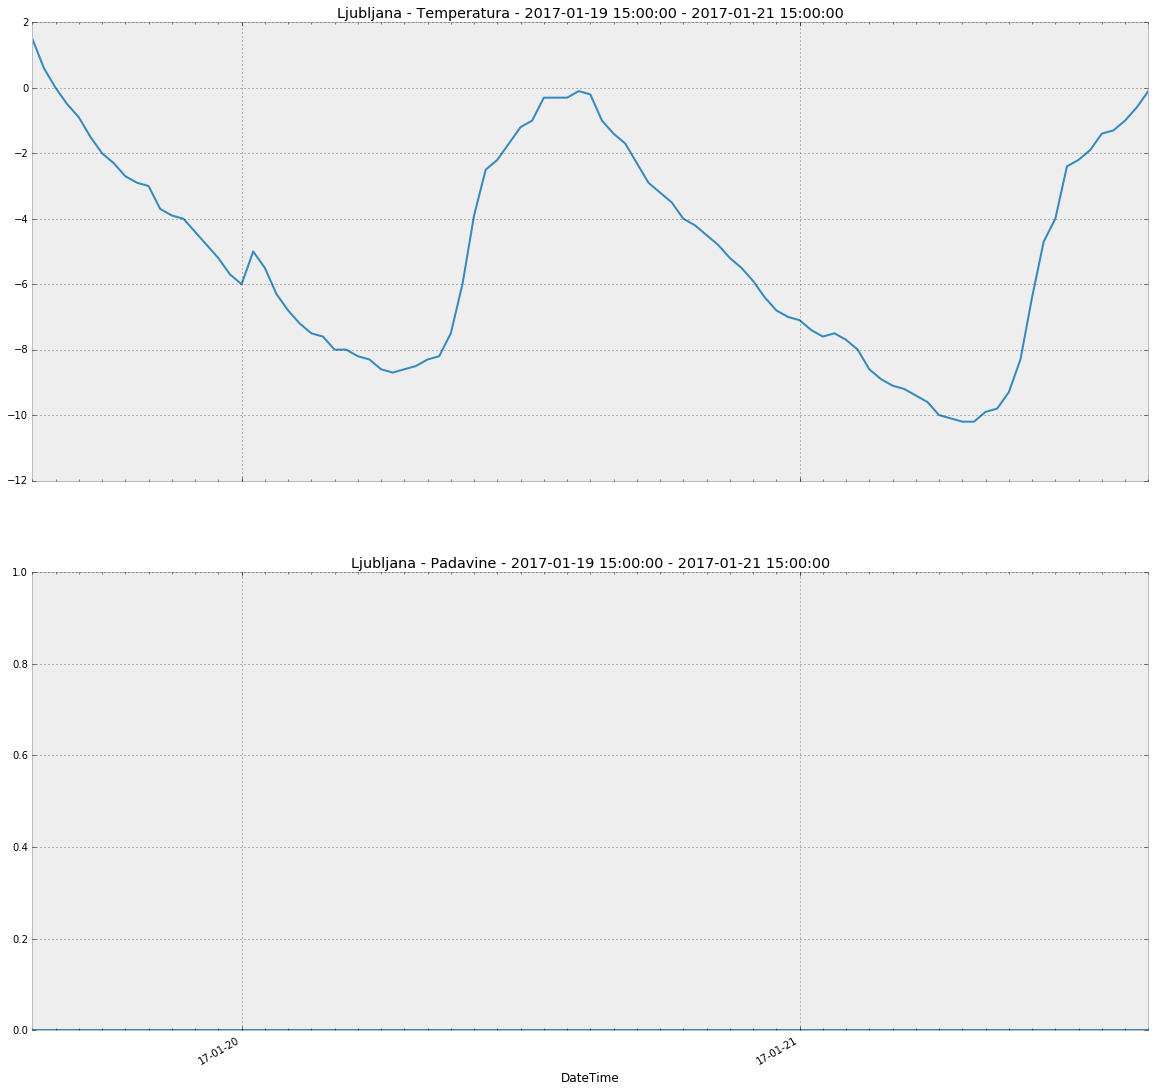

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
days = mdates.DayLocator()
hours = mdates.HourLocator()
axes[0].xaxis.set_major_locator(days)
axes[0].xaxis.set_minor_locator(hours)
axesFmt = mdates.DateFormatter("%y-%m-%d")
axes[0].xaxis.set_major_formatter(axesFmt)
axes[1].set_ylim(ymin = 0)
date_time_range = str(min(meteo_data_df.index)) + ' - ' + str(max(meteo_data_df.index))
meteo_data_df['Temp'].plot(title=station_name + ' - Temperatura - ' + date_time_range, ax=axes[0])
meteo_data_df['Perc'].plot(title=station_name + ' - Padavine - ' + date_time_range, ax=axes[1], drawstyle='steps-pre')
plt.show()